<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_2/Compressed/compressed_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 2
1. Buat model Deep learning MLP (PyTorch and Tensorflow). Column "Cover_Type" adalah target.
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.


### Analisa Data Sebelum Membangun Model

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          58

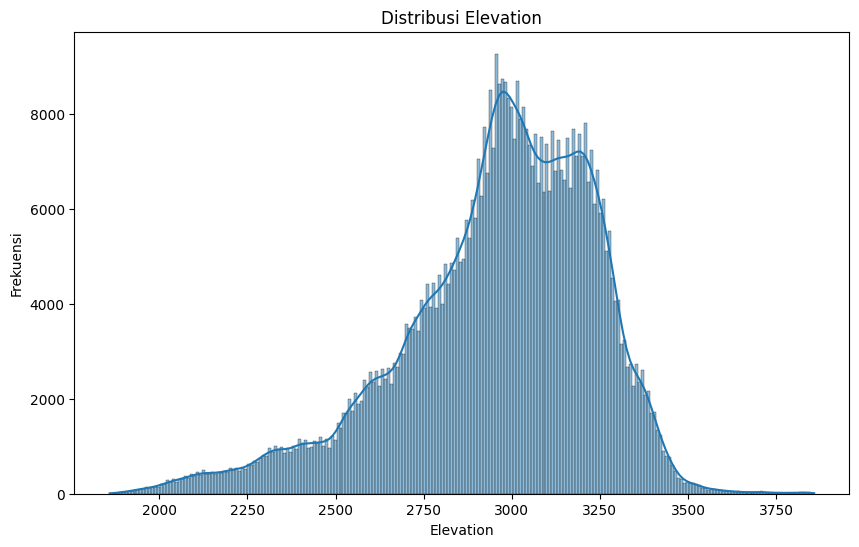

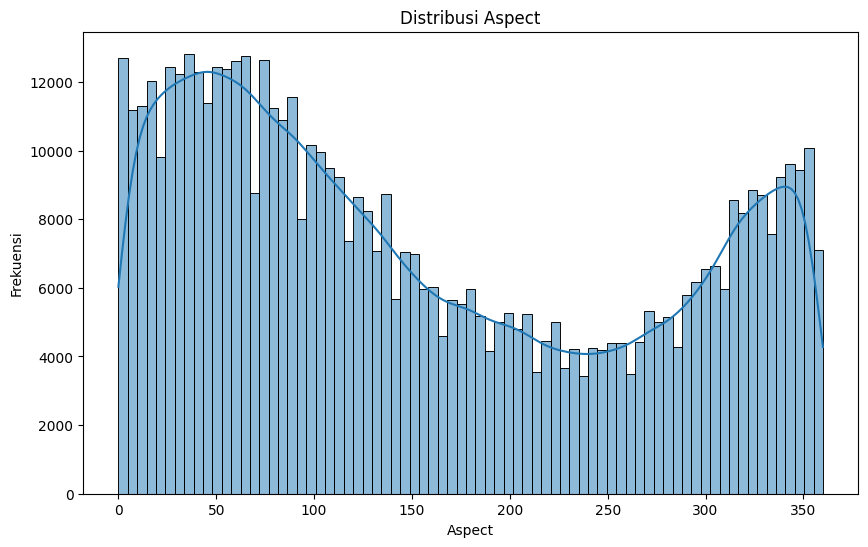

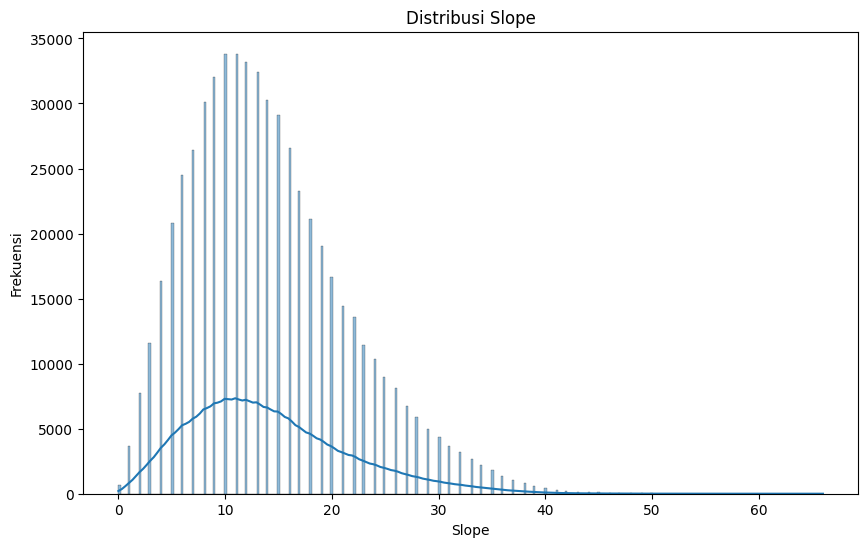

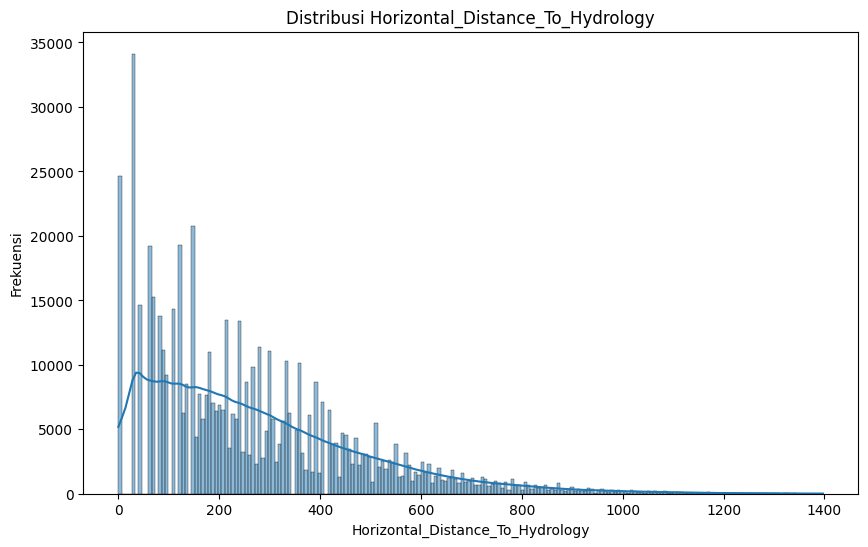

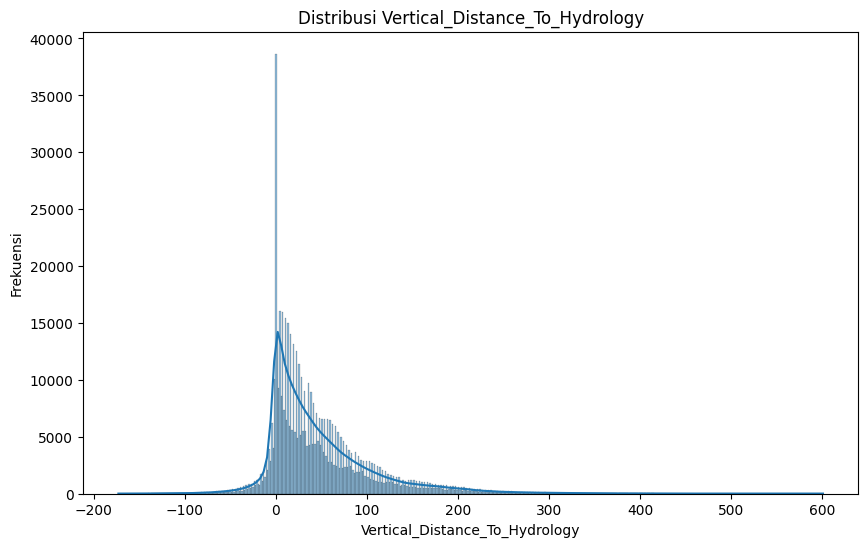

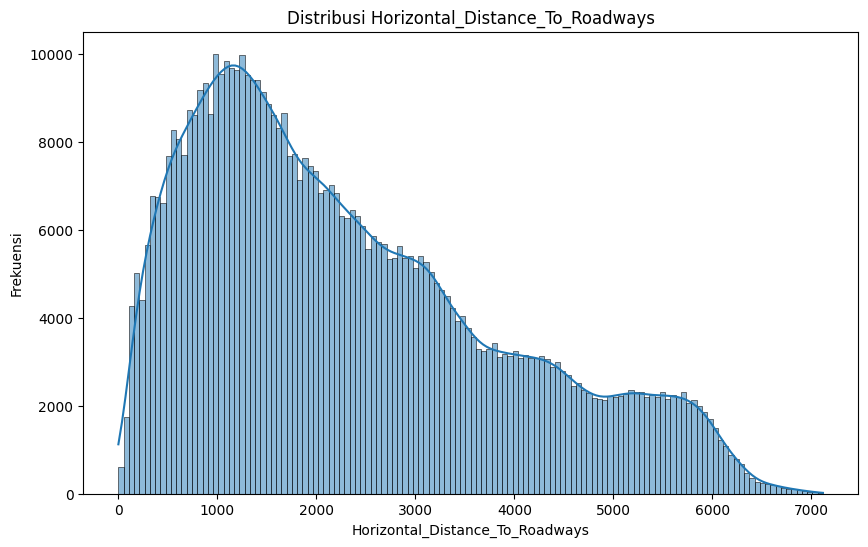

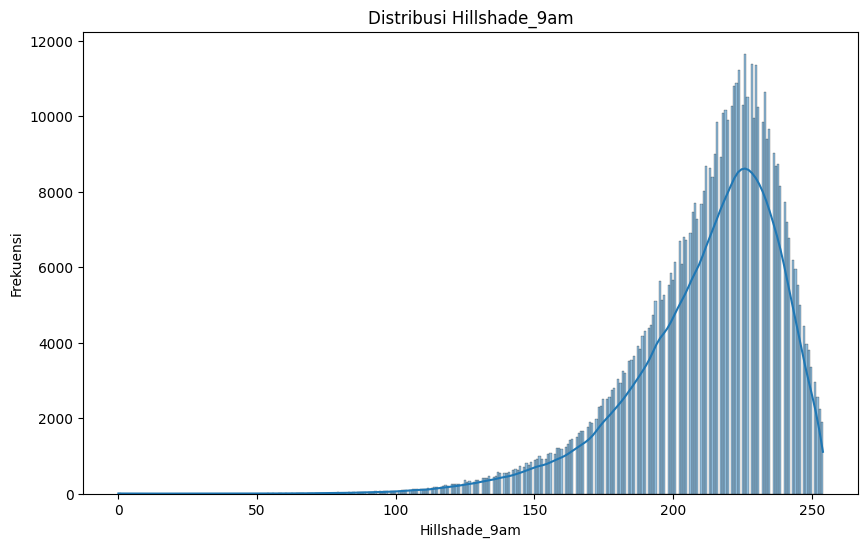

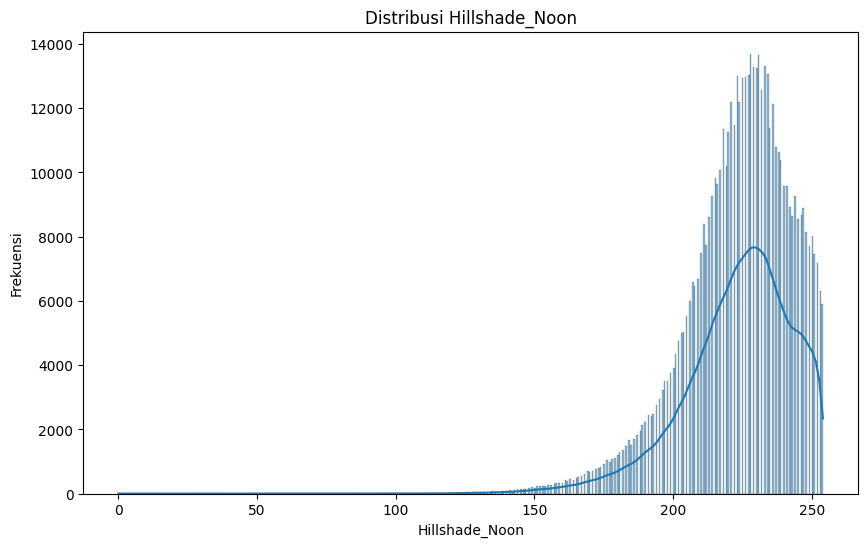

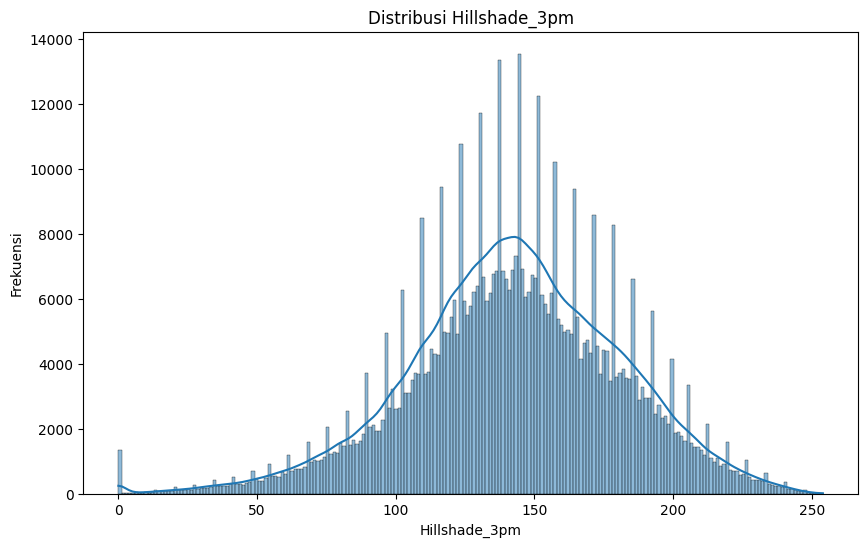

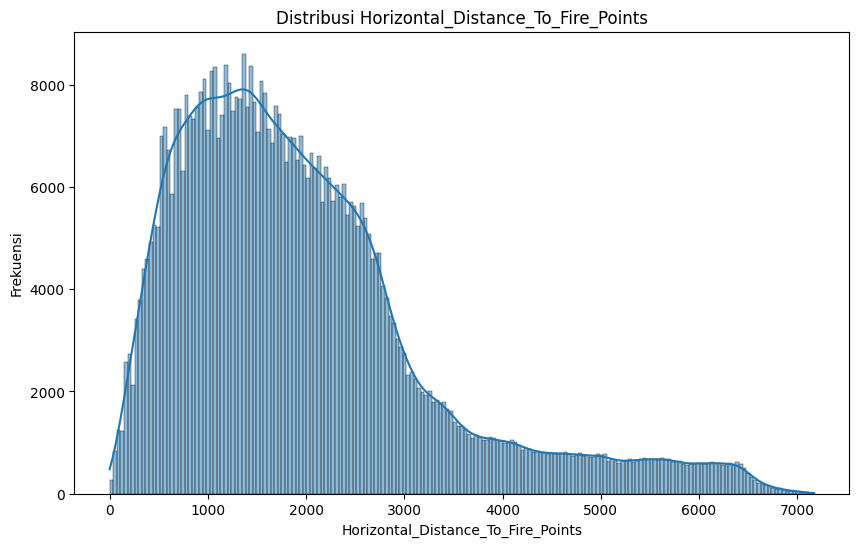

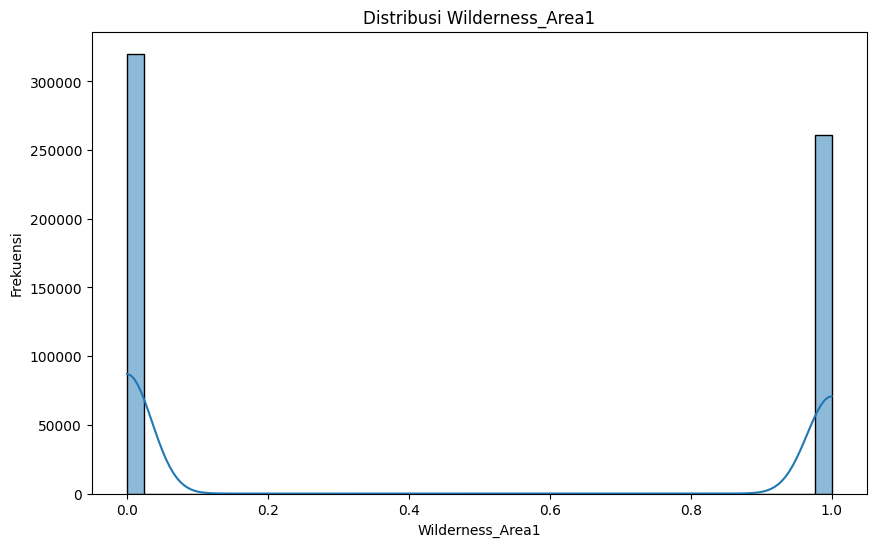

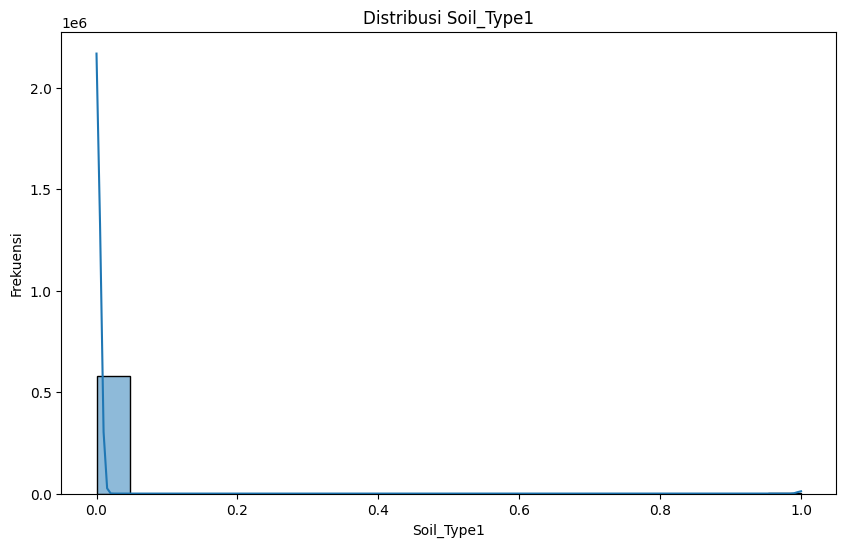

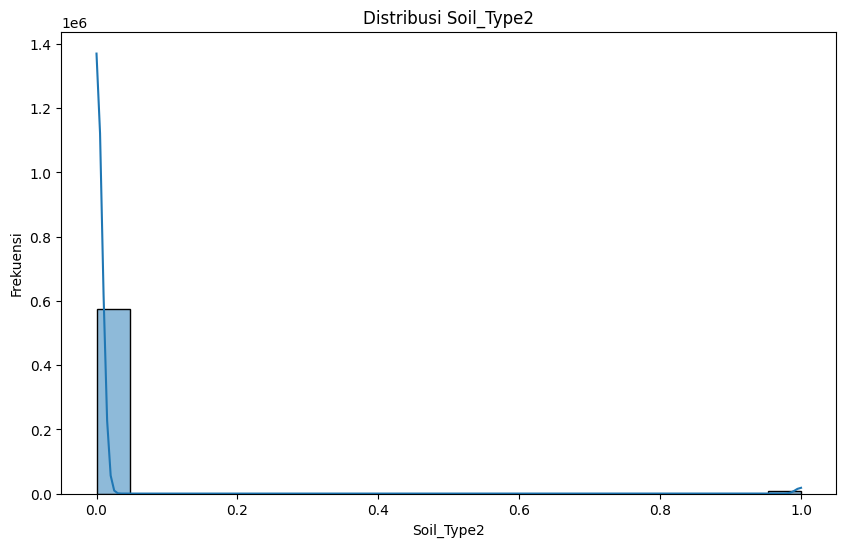

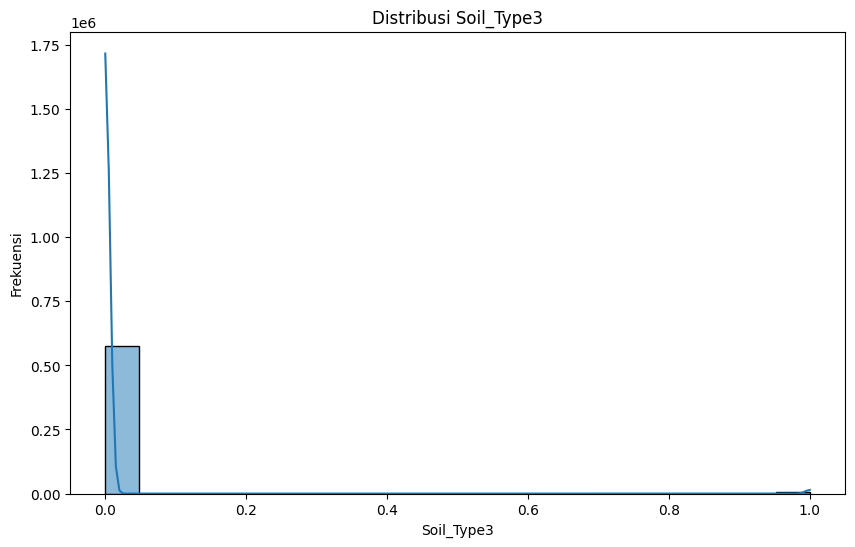

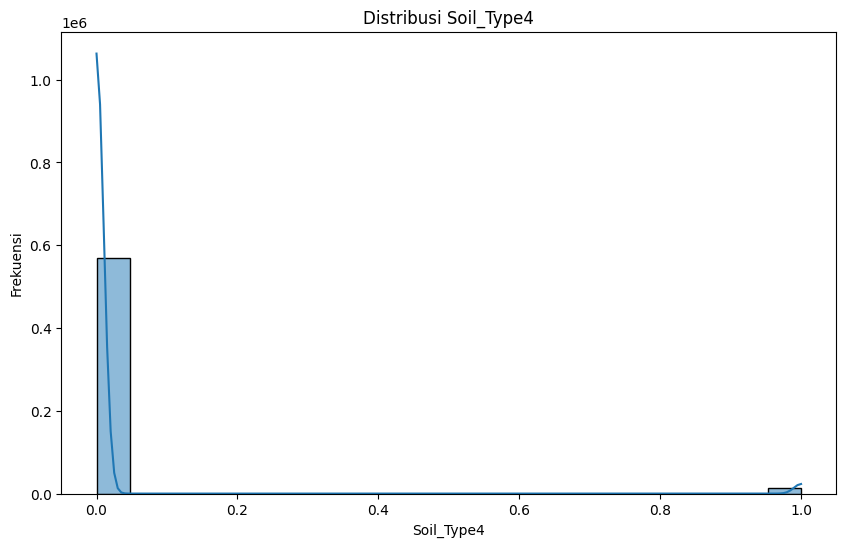

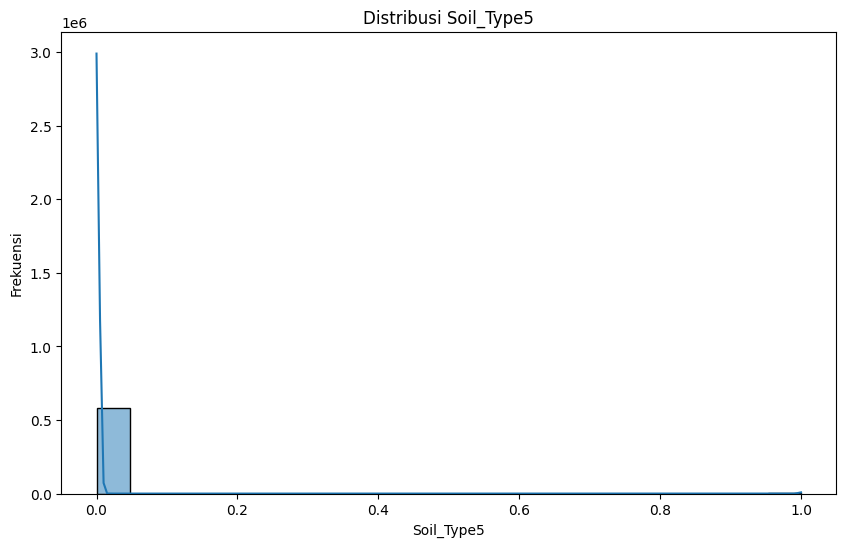

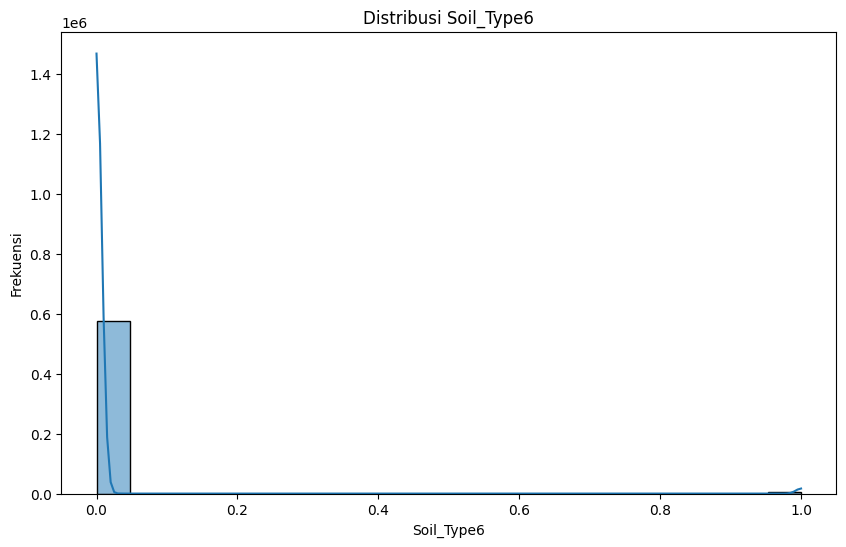

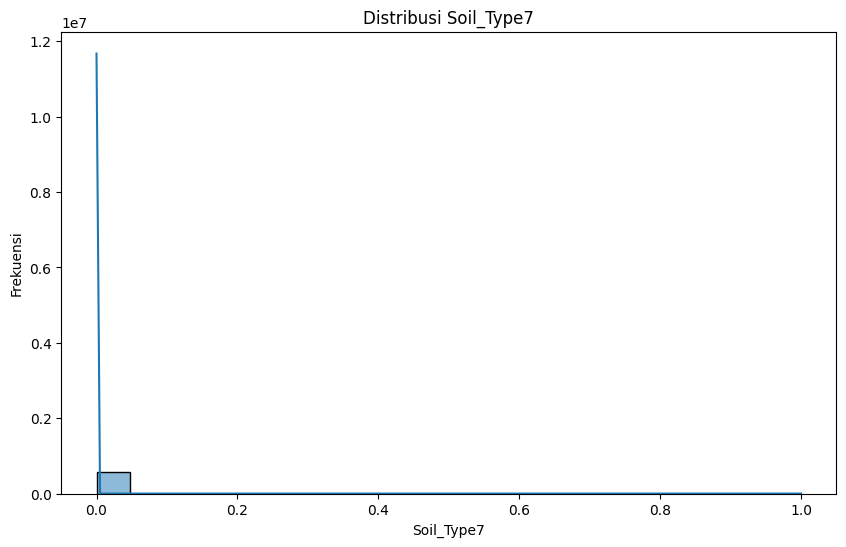

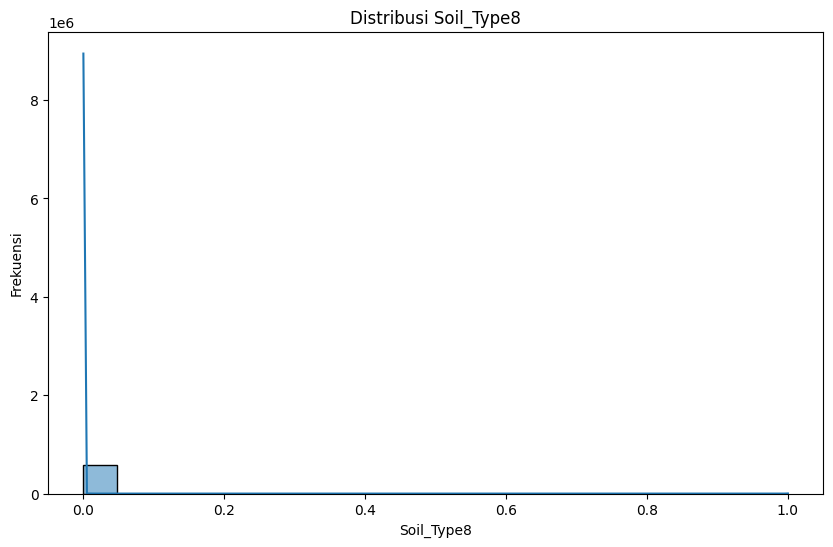

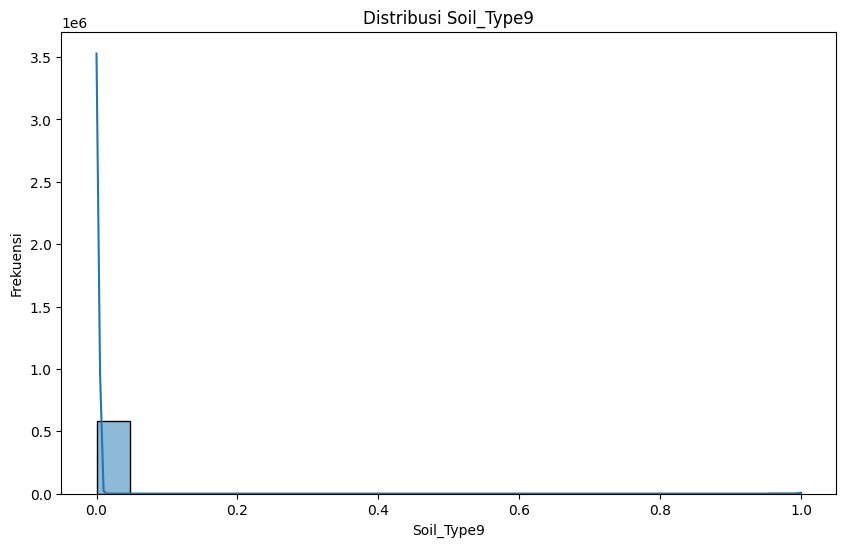

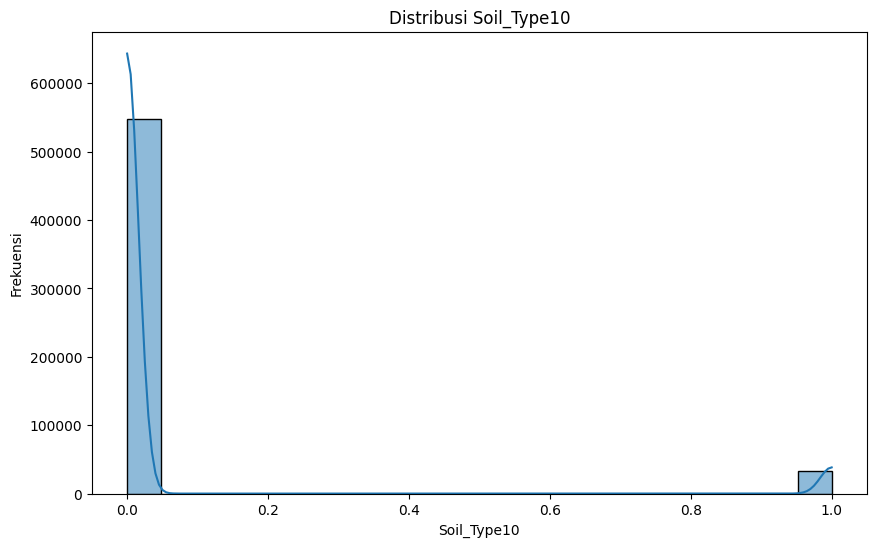

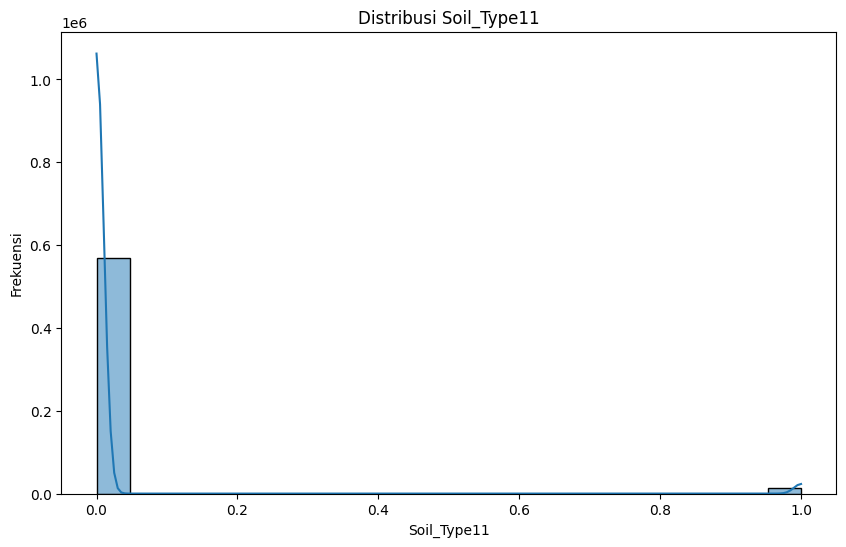

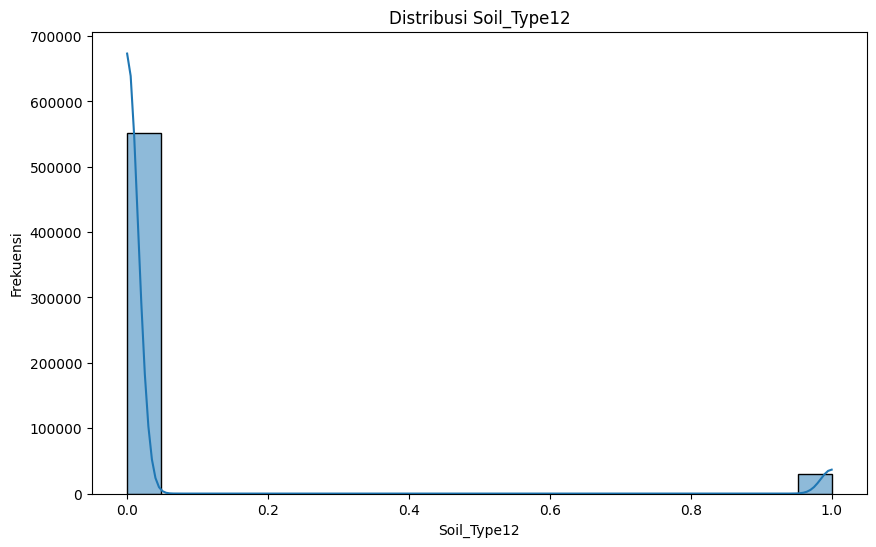

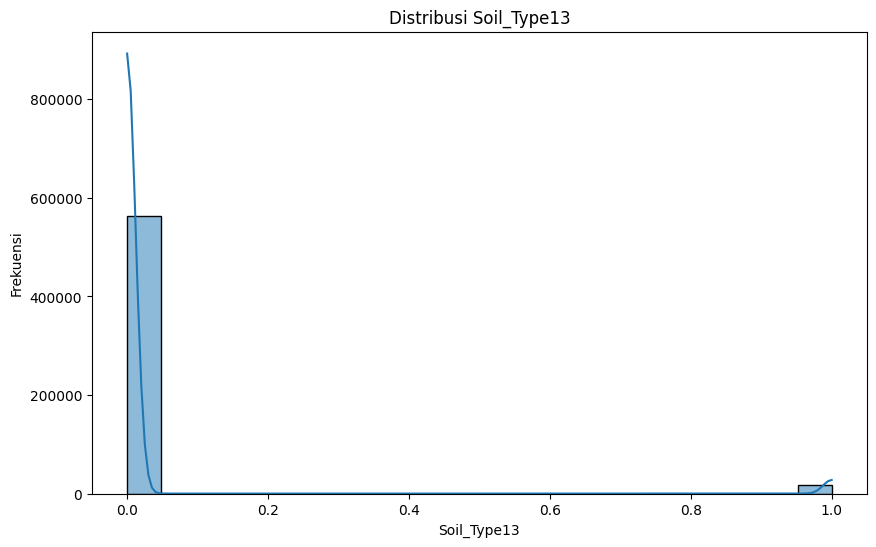

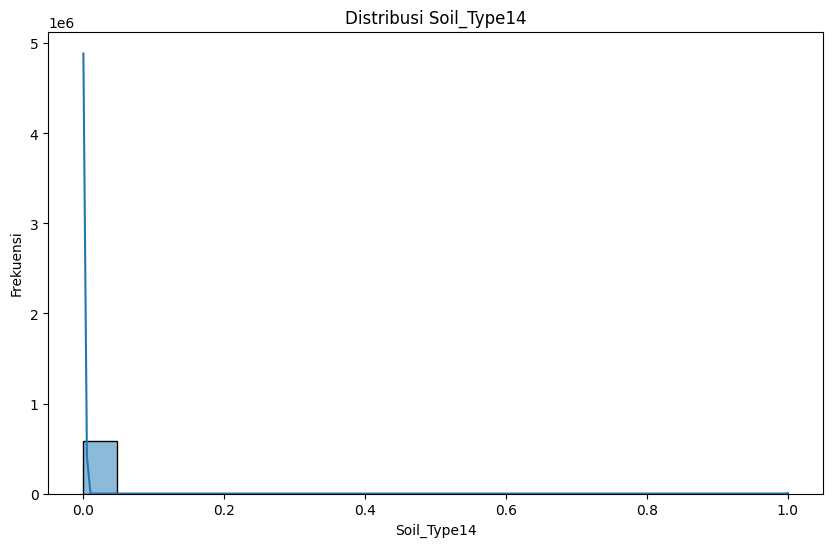

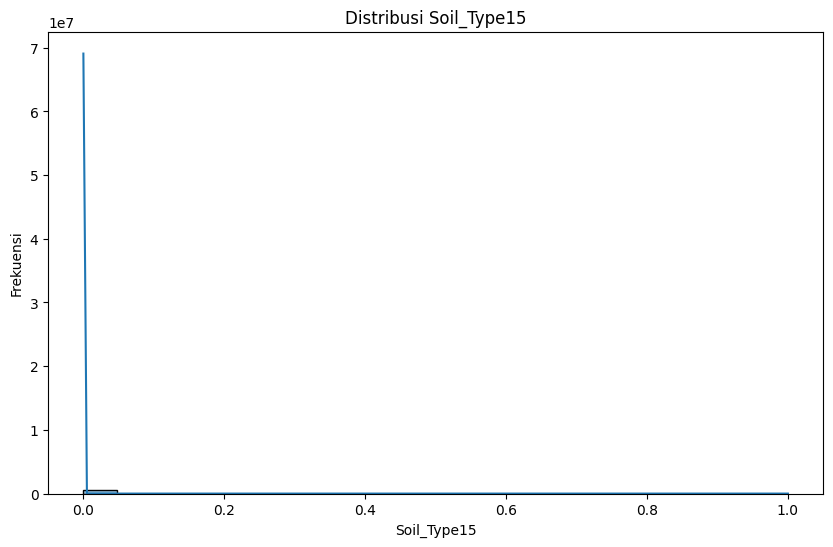

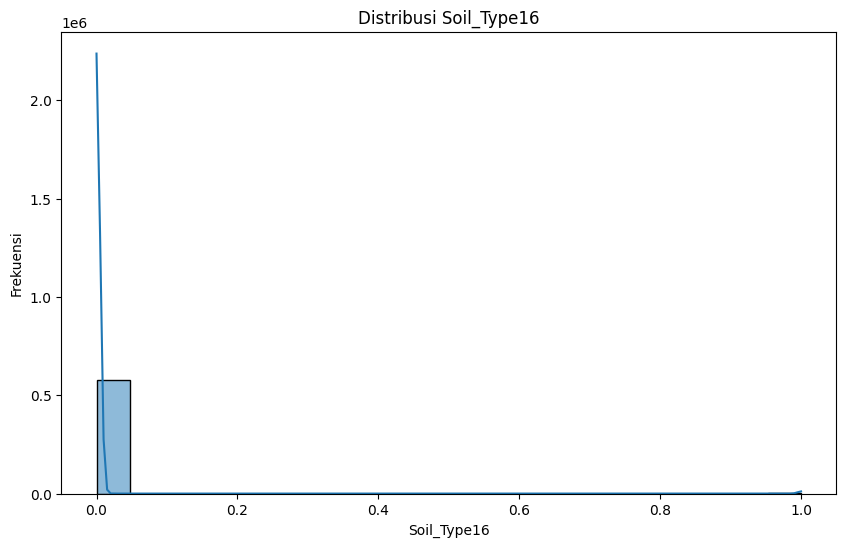

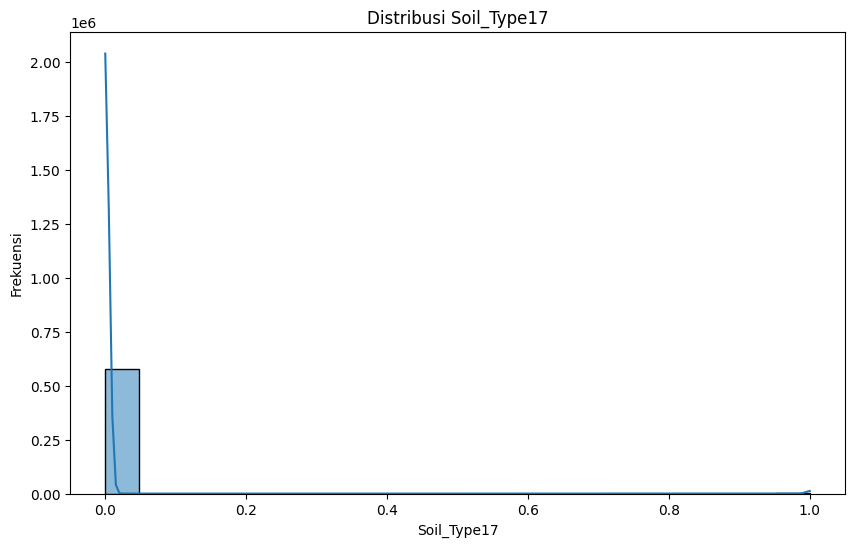

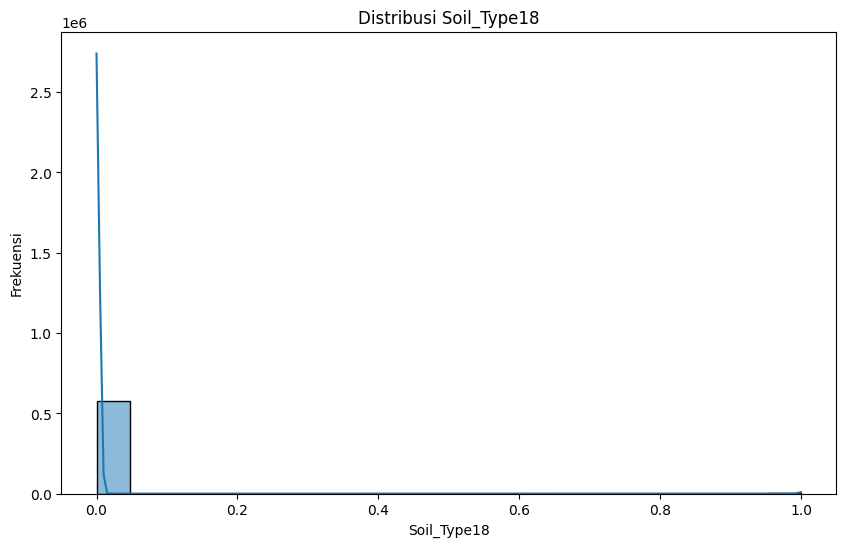

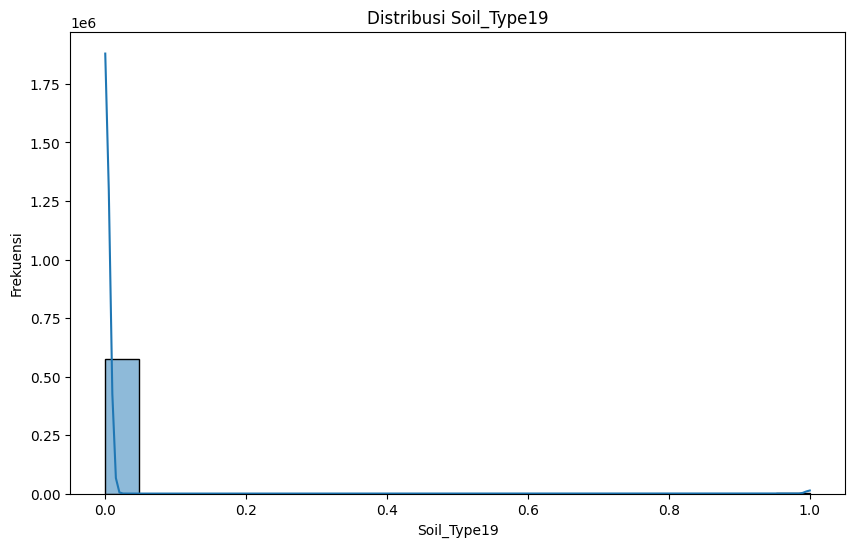

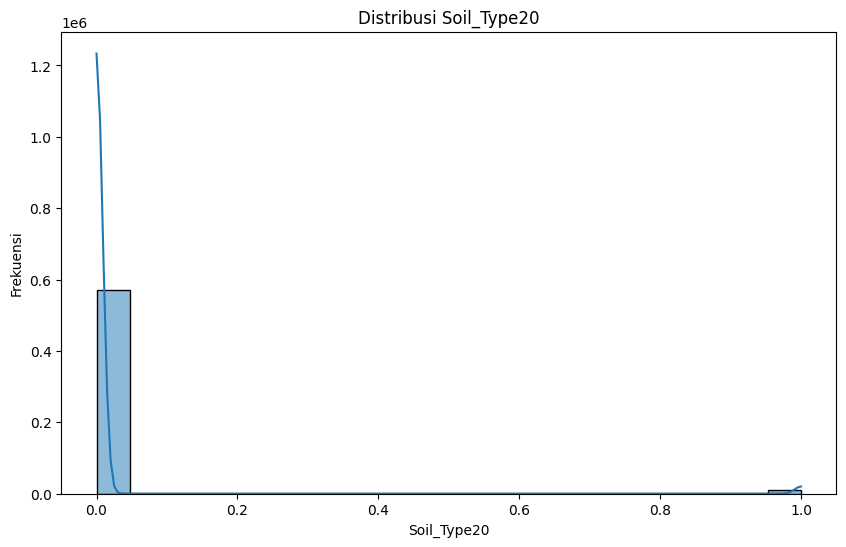

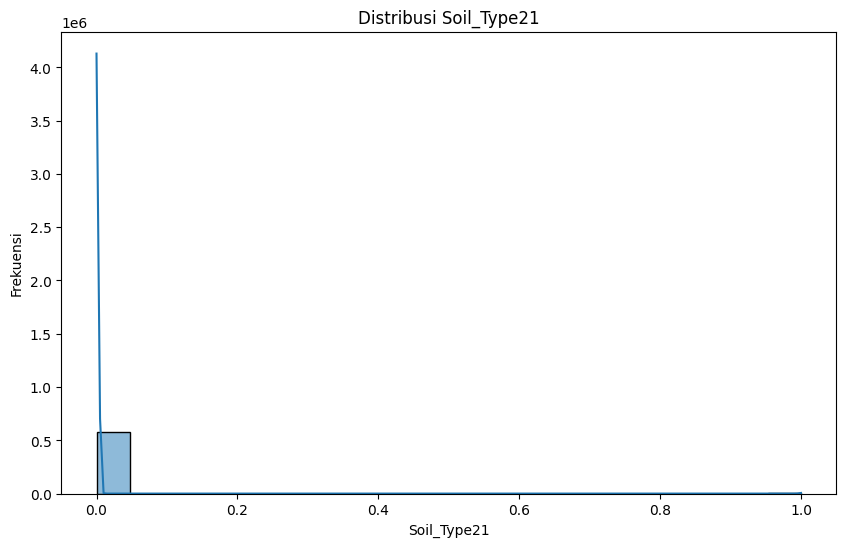

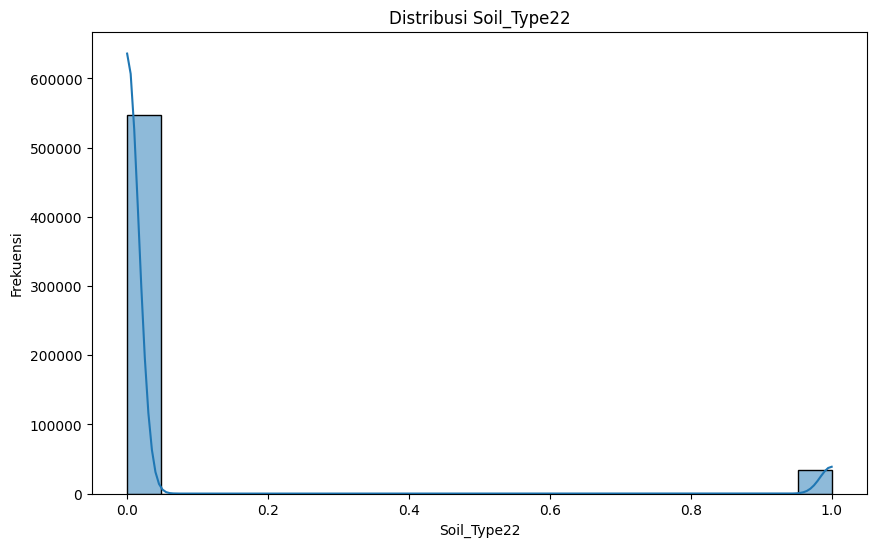

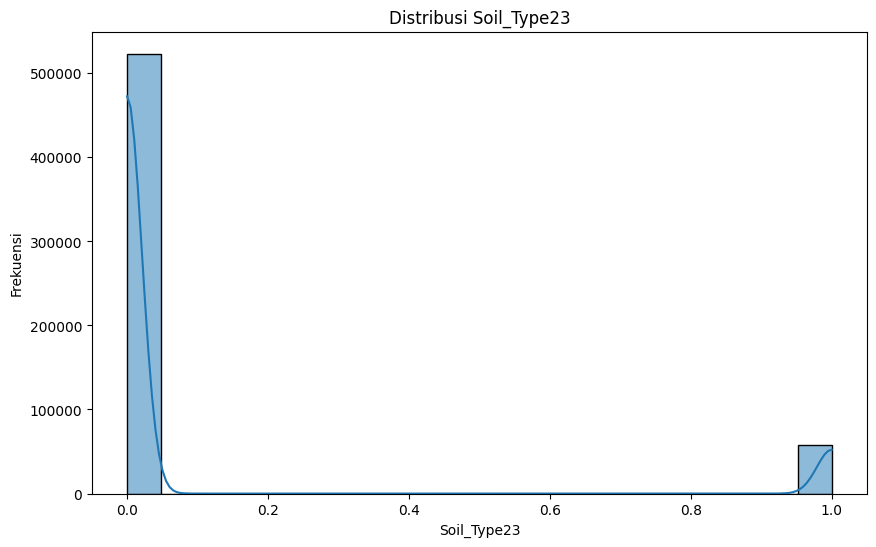

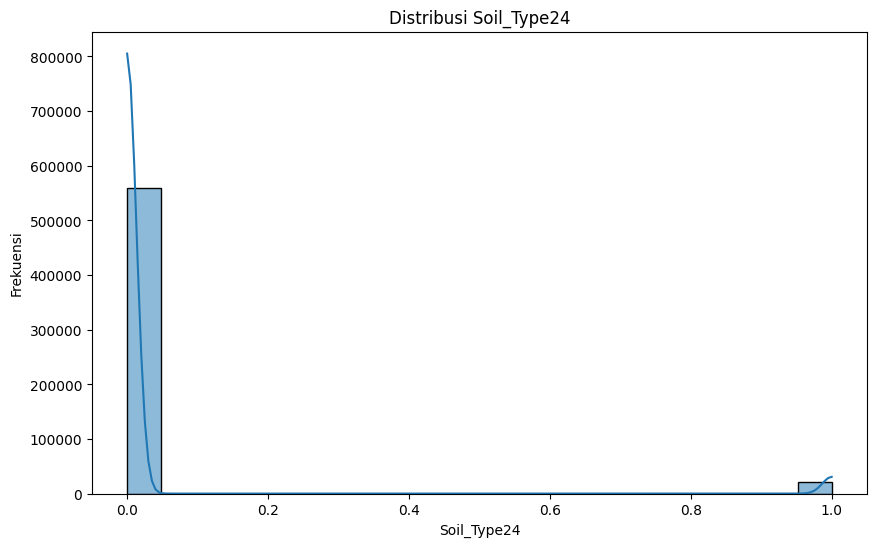

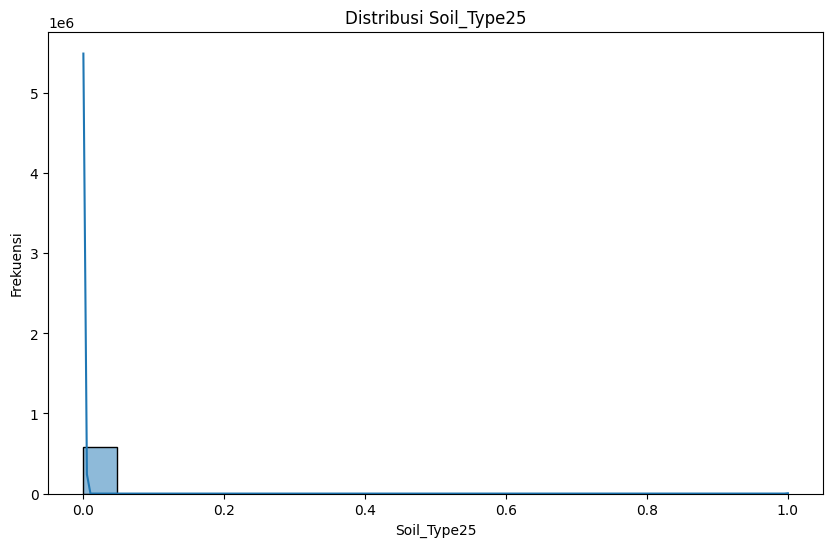

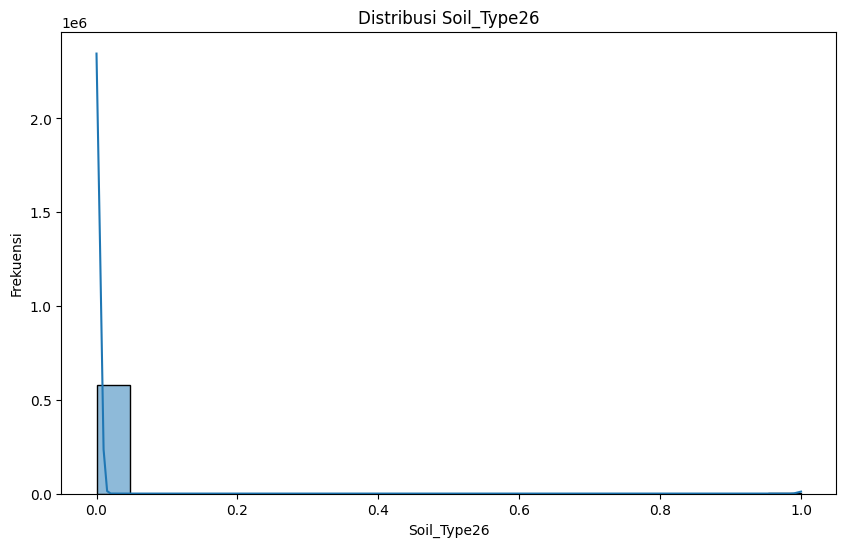

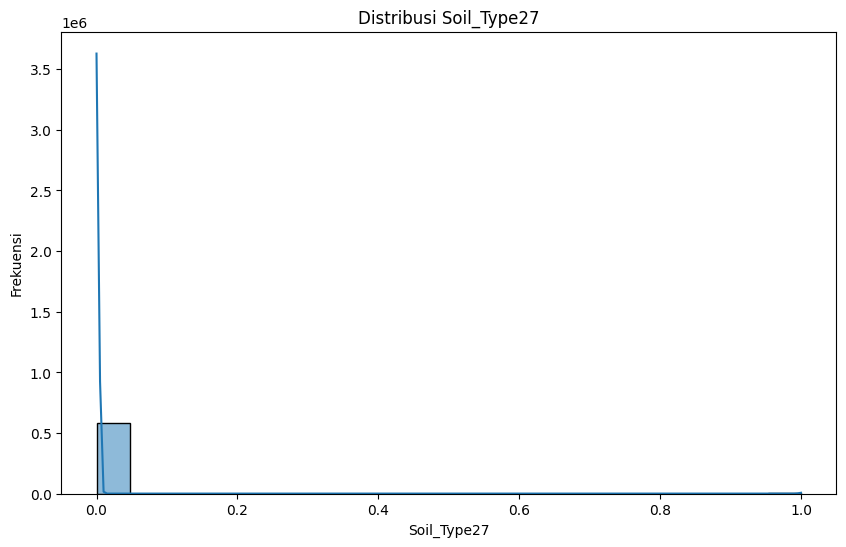

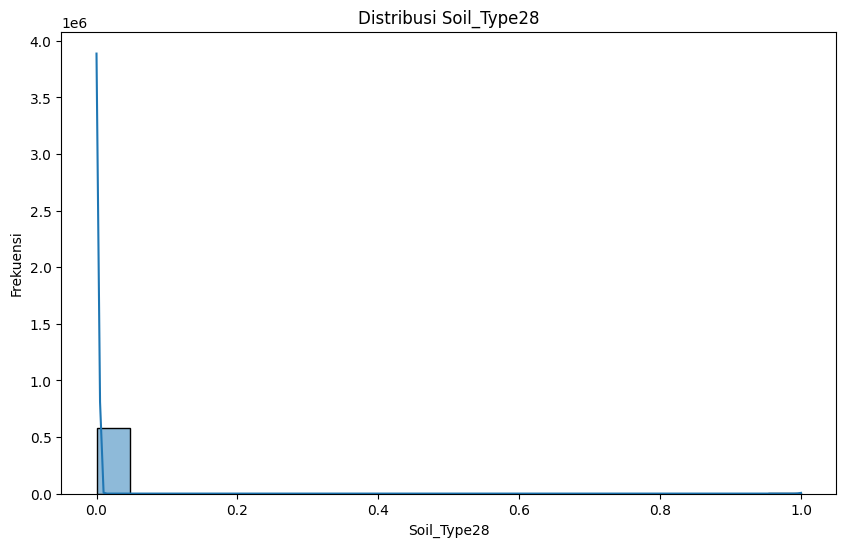

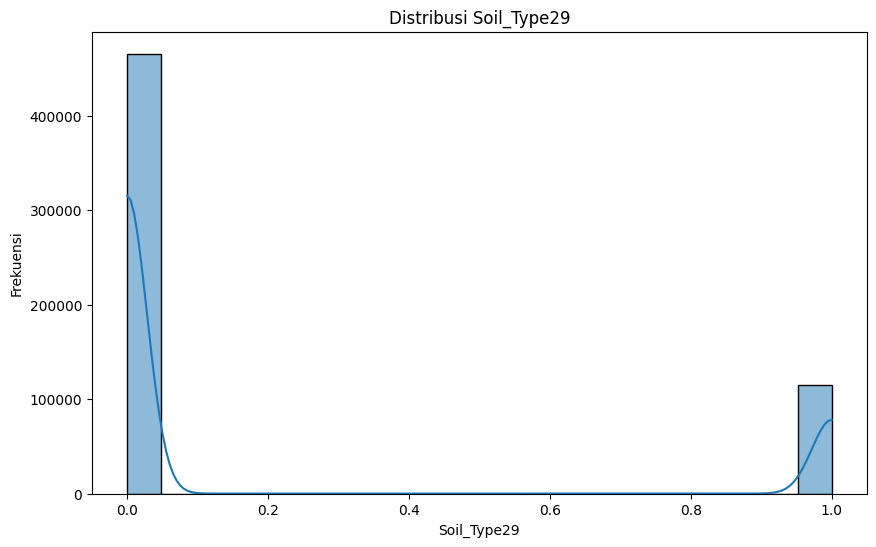

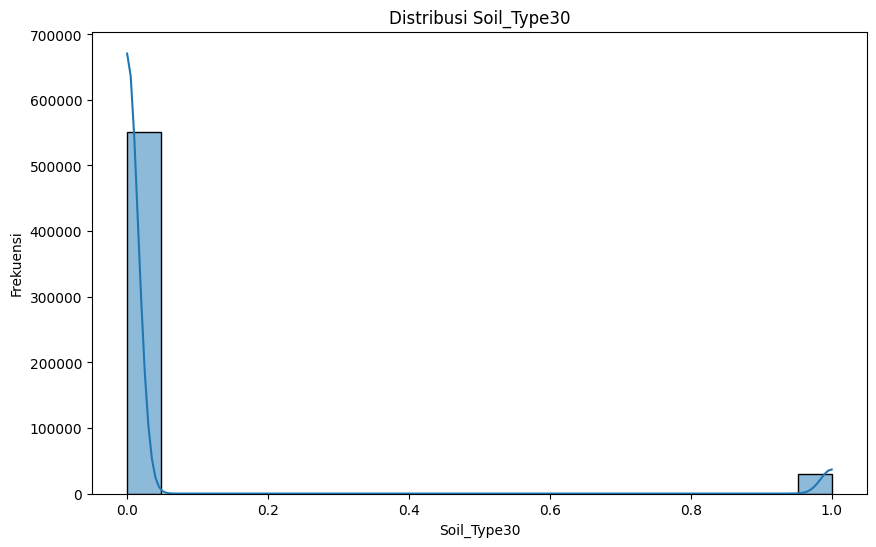

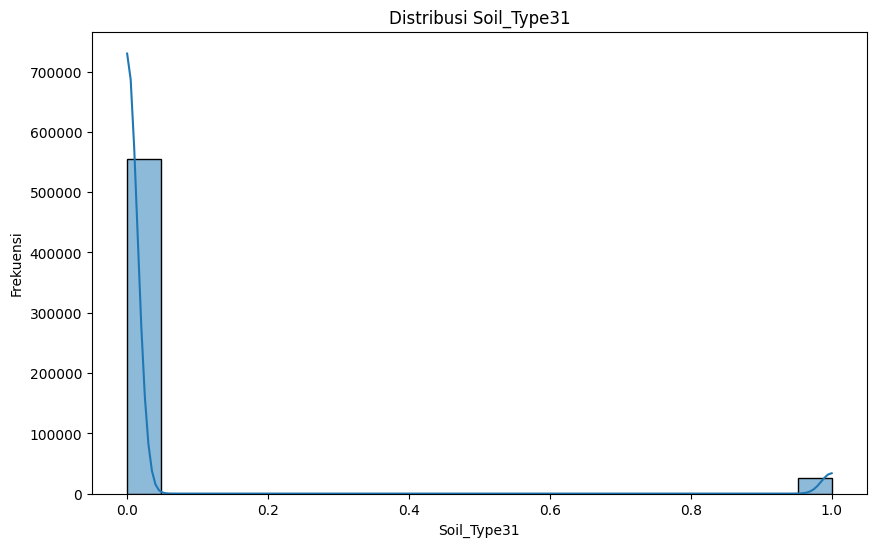

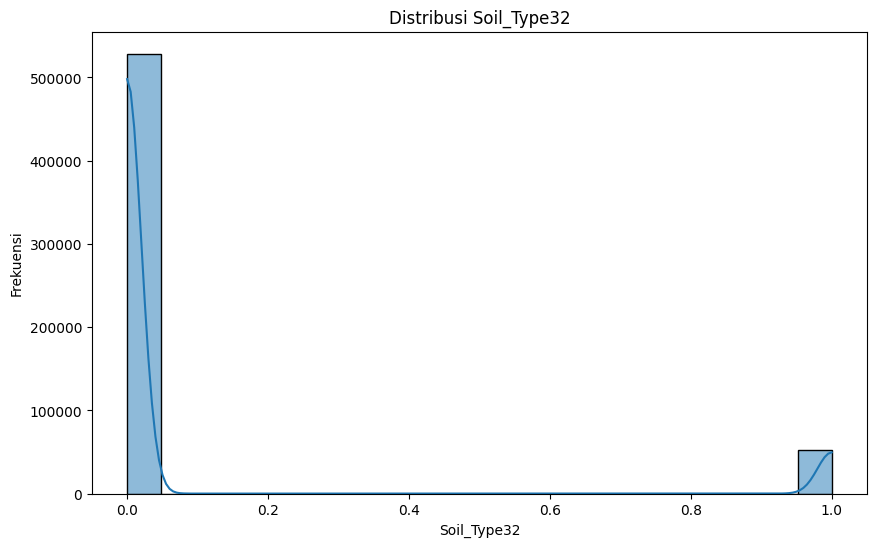

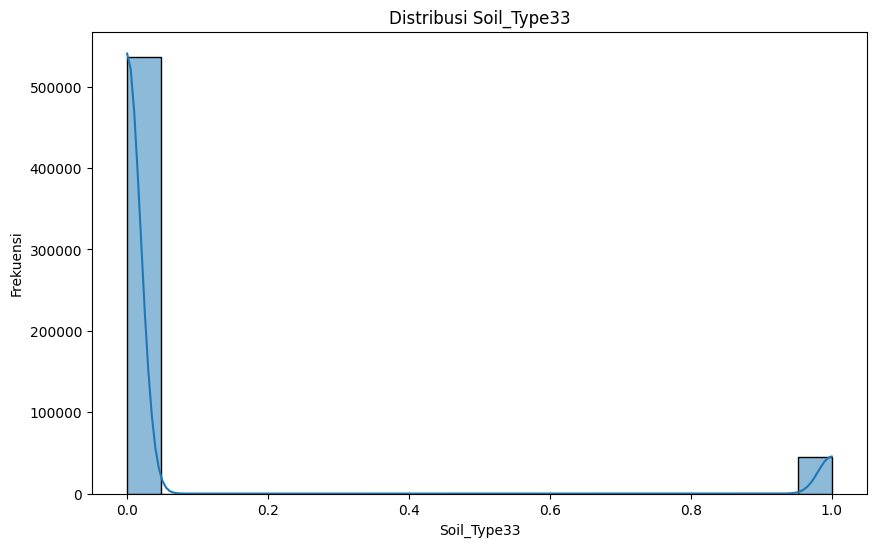

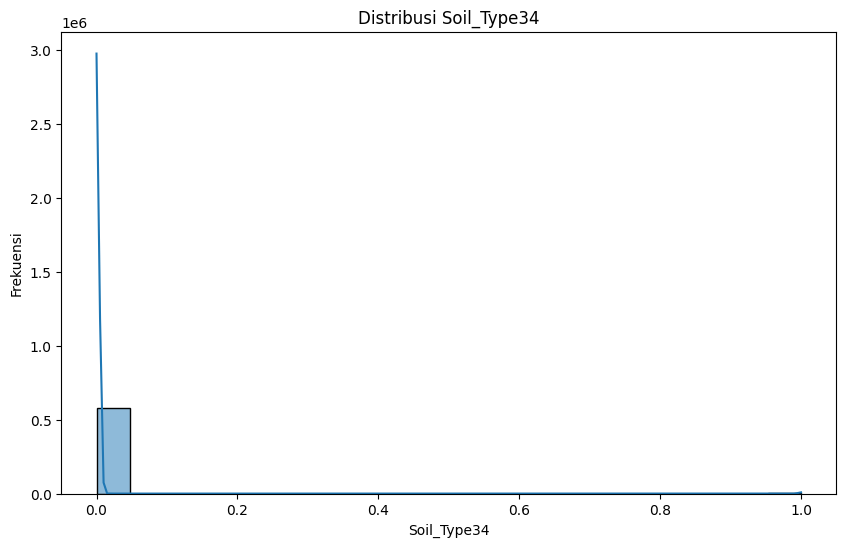

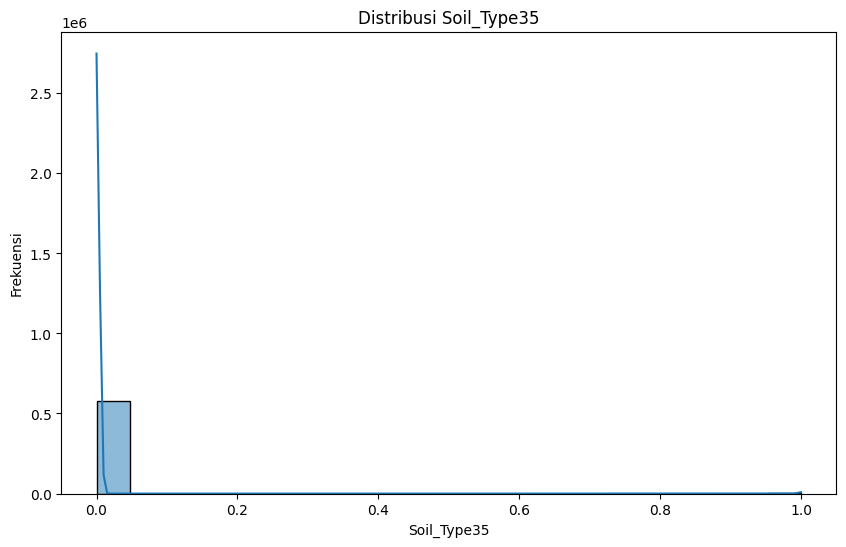

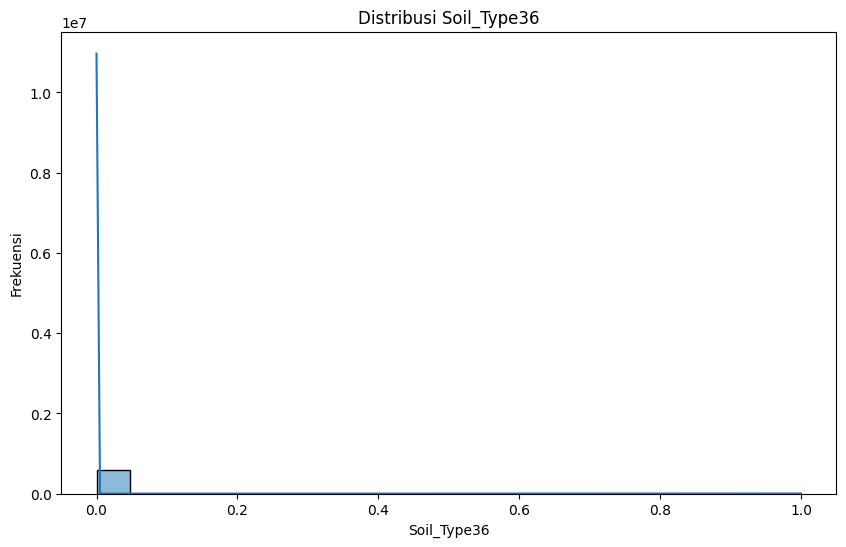

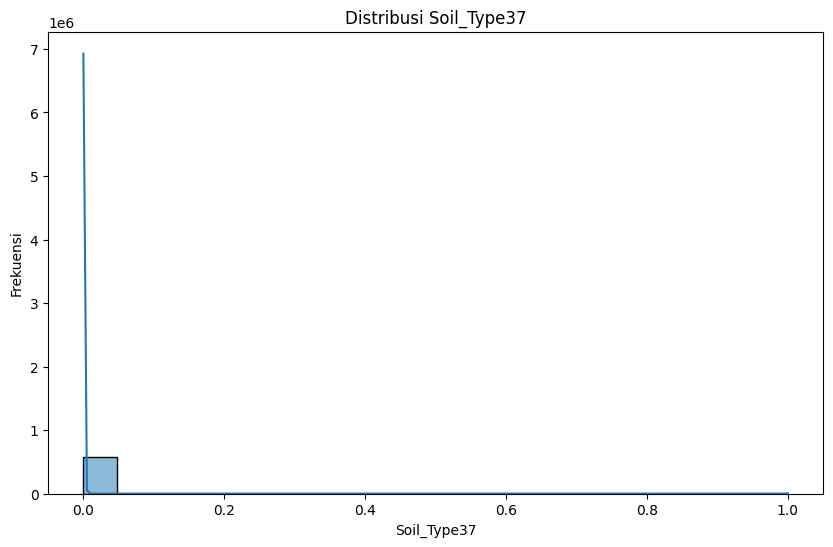

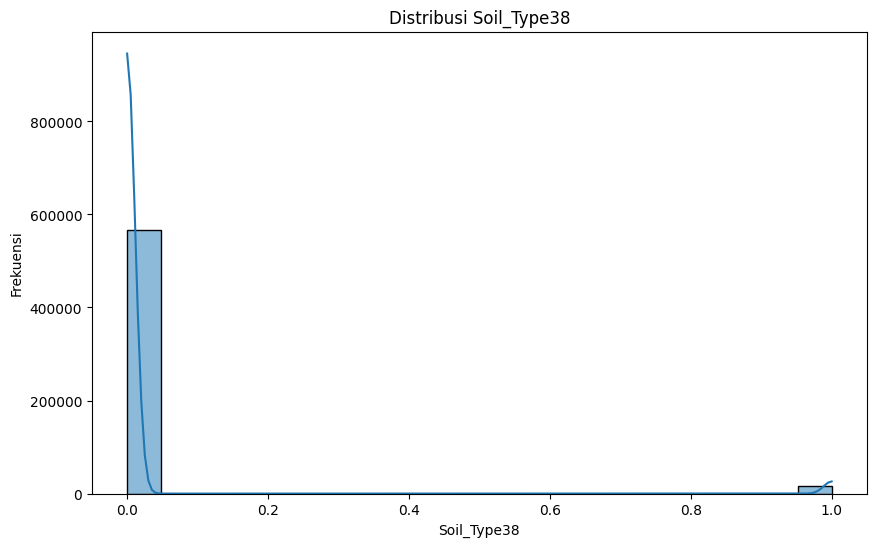

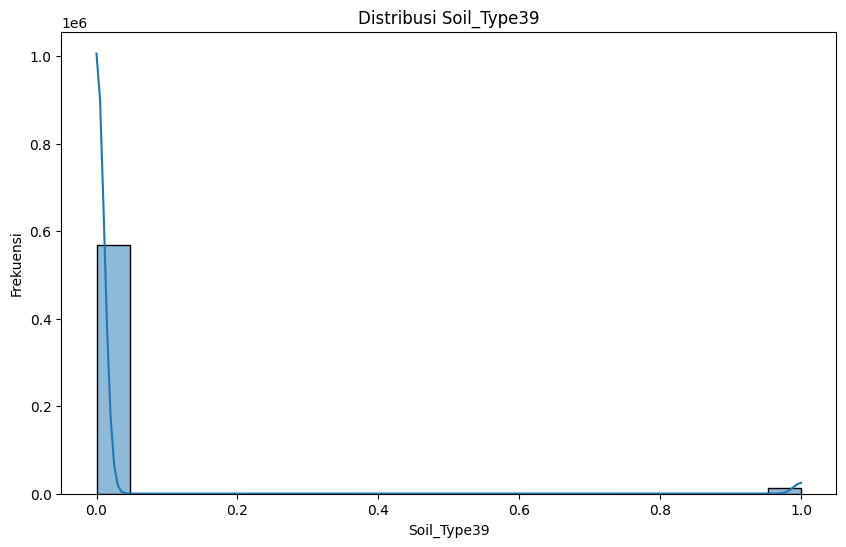

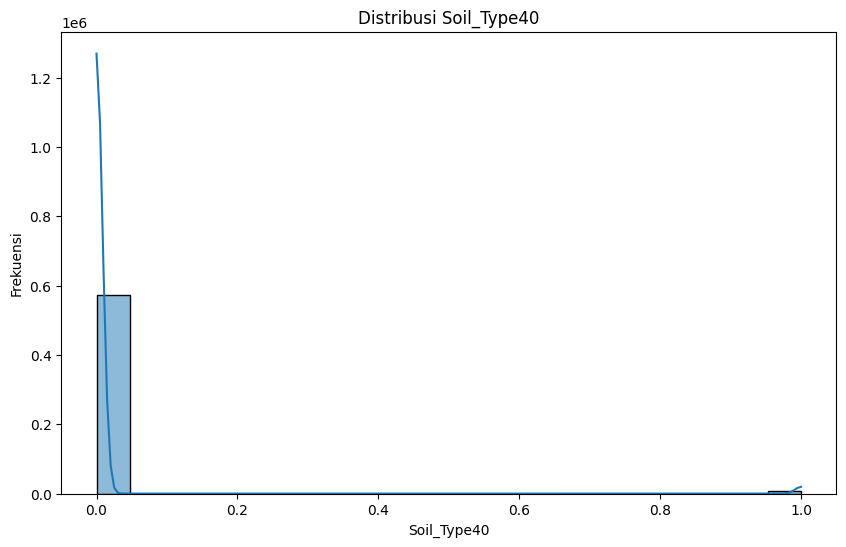

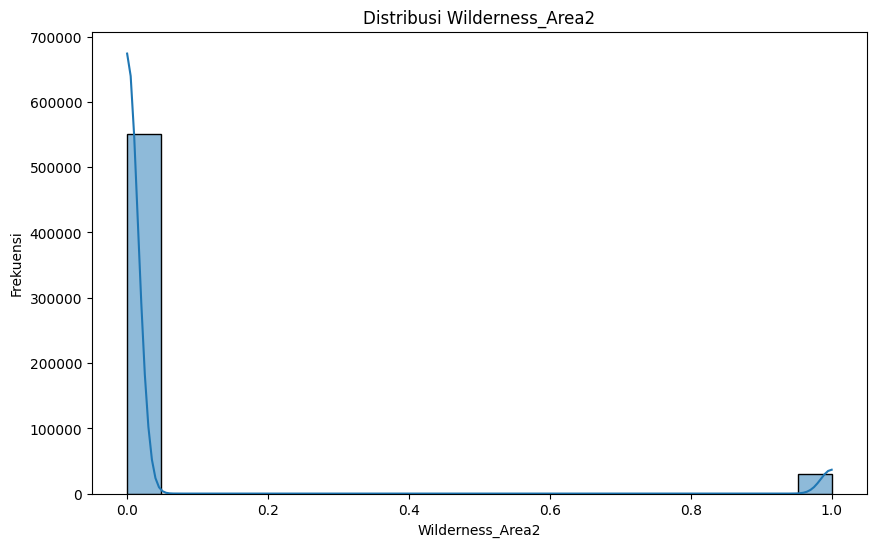

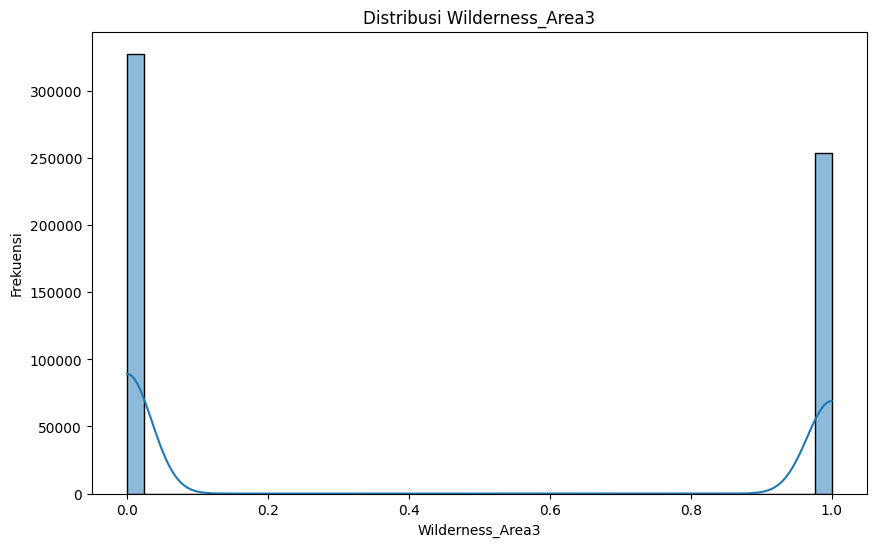

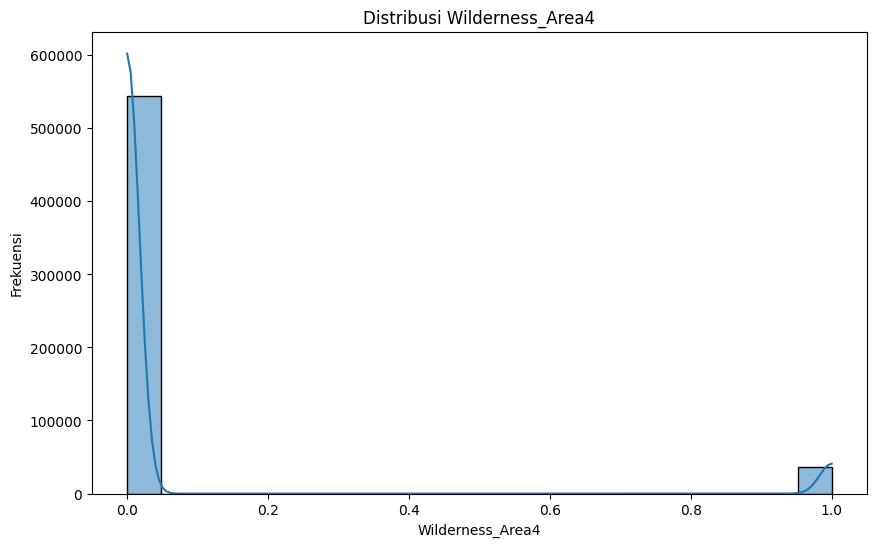

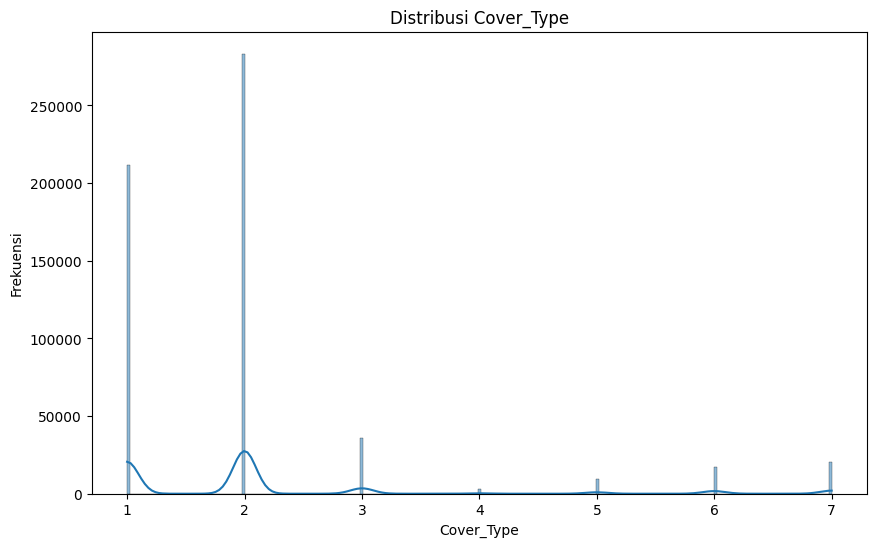

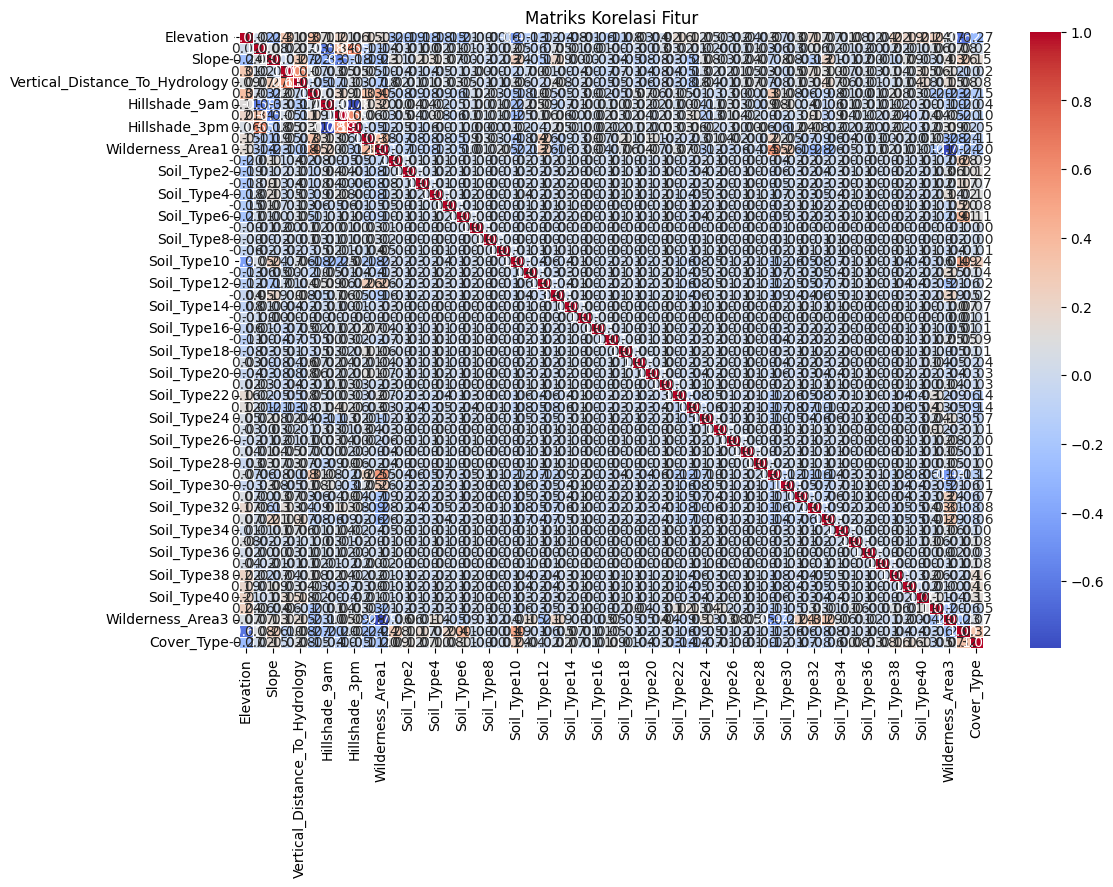

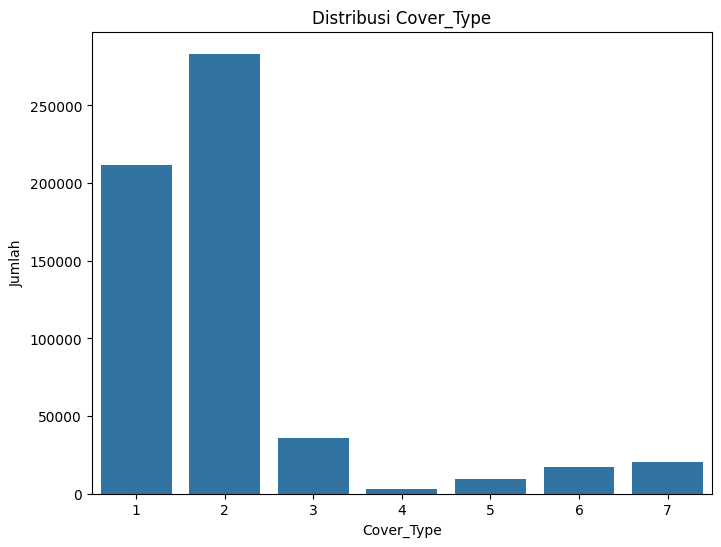

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("compressed_data.csv")

# 1. Memahami Struktur Data
print("Info Dataset:")
print(df.info())  # Menampilkan tipe data dan jumlah non-null
print("\nStatistik Deskriptif:")
print(df.describe())  # Menampilkan statistik deskriptif (mean, std, min, max)

# 2. Analisis Nilai Hilang
print("\nNilai Hilang:")
print(df.isnull().sum())  # Mengecek jumlah nilai hilang per kolom

# 3. Distribusi Fitur (contoh untuk beberapa kolom numerik)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Kolom numerik

# Visualisasi distribusi fitur numerik
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

# 4. Korelasi Antar Fitur
# Melihat korelasi antar fitur numerik
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi Fitur')
plt.show()

# 5. Pemeriksaan Label Target
# Distribusi kelas pada target "Cover_Type"
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=df)
plt.title('Distribusi Cover_Type')
plt.xlabel('Cover_Type')
plt.ylabel('Jumlah')
plt.show()


### Info Penting Dataset:
- Dataset Bersih: Tidak ada nilai yang hilang, jadi tidak perlu khawatir tentang pengisian data hilang.
- Distribusi yang Baik: Beberapa fitur menunjukkan variasi yang besar, yang memberi peluang untuk menemukan pola yang bermakna.
- Target Imbang: Dataset memiliki distribusi yang relatif seimbang pada variabel target Cover_Type, meskipun kelas 2 sedikit lebih dominan.
- Fitur Binari: Beberapa kolom seperti Soil_Type dan Wilderness_Area adalah biner (0 atau 1), yang merupakan ciri khas fitur yang menjelaskan kategori tertentu.

Epoch 1, Loss: 2.0513498783111572, Val Loss: 1.991290807723999
Epoch 2, Loss: 2.0104870796203613, Val Loss: 1.9514209032058716
Epoch 3, Loss: 1.9704201221466064, Val Loss: 1.9126384258270264
Epoch 4, Loss: 1.932280421257019, Val Loss: 1.8749423027038574
Epoch 5, Loss: 1.8943207263946533, Val Loss: 1.8383240699768066
Epoch 6, Loss: 1.8573002815246582, Val Loss: 1.8027663230895996
Epoch 7, Loss: 1.8218228816986084, Val Loss: 1.7682406902313232
Epoch 8, Loss: 1.7875804901123047, Val Loss: 1.7347114086151123
Epoch 9, Loss: 1.754342794418335, Val Loss: 1.702138066291809
Epoch 10, Loss: 1.7219716310501099, Val Loss: 1.6704765558242798
Epoch 11, Loss: 1.690413475036621, Val Loss: 1.6396815776824951
Epoch 12, Loss: 1.6596423387527466, Val Loss: 1.609702706336975
Epoch 13, Loss: 1.6301161050796509, Val Loss: 1.5804986953735352
Epoch 14, Loss: 1.6009125709533691, Val Loss: 1.5520275831222534
Epoch 15, Loss: 1.5725585222244263, Val Loss: 1.5242536067962646
Epoch 16, Loss: 1.5454277992248535, Val 

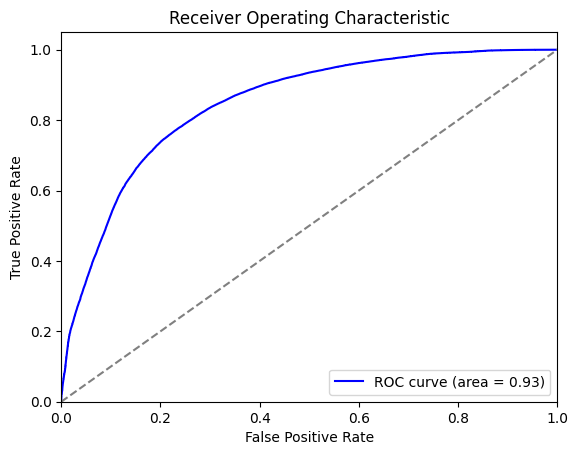

In [5]:
# Import libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("compressed_data.csv")

# Hapus baris dengan NaN di target
df = df.dropna(subset=['Cover_Type'])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"] - 1  # Mengurangi 1 agar kelas mulai dari 0 (karena PyTorch membutuhkan label 0-based)

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Konversi ke Tensor PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

# Definisi Model PyTorch dengan Dropout
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(0.5)  # Dropout untuk regularisasi

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Terapkan dropout
        x = self.fc2(x)
        return x

# Inisialisasi model
input_size = X_train.shape[1]
hidden_size = 128
num_classes = len(np.unique(y))
model_torch = MLPModel(input_size, hidden_size, num_classes)

# Definisi loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

# Early stopping manual PyTorch
early_stop_patience = 5
best_loss = float("inf")
patience = 0

# Training model PyTorch
for epoch in range(200):
    model_torch.train()
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    # Validasi
    with torch.no_grad():
        model_torch.eval()
        val_outputs = model_torch(X_test_torch)
        val_loss = criterion(val_outputs, y_test_torch)

    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    # Early stopping
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        patience = 0
    else:
        patience += 1
    if patience >= early_stop_patience:
        print("Early stopping!")
        break

# Evaluasi PyTorch
model_torch.eval()
y_pred_torch = torch.argmax(model_torch(X_test_torch), axis=1).numpy()

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_torch)
precision = precision_score(y_test, y_pred_torch, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_torch, average='weighted')
f1 = f1_score(y_test, y_pred_torch, average='weighted')

# Menggunakan softmax untuk menghitung probabilitas untuk AUC-ROC
probabilities = F.softmax(model_torch(X_test_torch), dim=1).detach().numpy()

# Hitung AUC-ROC menggunakan probabilitas
roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1], pos_label=1)  # AUC for class 1 (example)

# Print hasil evaluasi
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# TensorFlow

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - accuracy: 0.7045 - loss: 0.7074 - val_accuracy: 0.7597 - val_loss: 0.5569
Epoch 2/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7473 - loss: 0.5857 - val_accuracy: 0.7751 - val_loss: 0.5264
Epoch 3/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7551 - loss: 0.5692 - val_accuracy: 0.7787 - val_loss: 0.5172
Epoch 4/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7571 - loss: 0.5634 - val_accuracy: 0.7855 - val_loss: 0.5028
Epoch 5/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.7607 - loss: 0.5518 - val_accuracy: 0.7859 - val_loss: 0.4971
Epoch 6/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.7654 - loss: 0.5422 - val_accuracy: 0.7873 - val_loss: 0.4939
Epoch 7/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7657 - loss: 0.5400 - val_accuracy: 0.7925 - val_loss: 0.4845
Epoch 8/30
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 

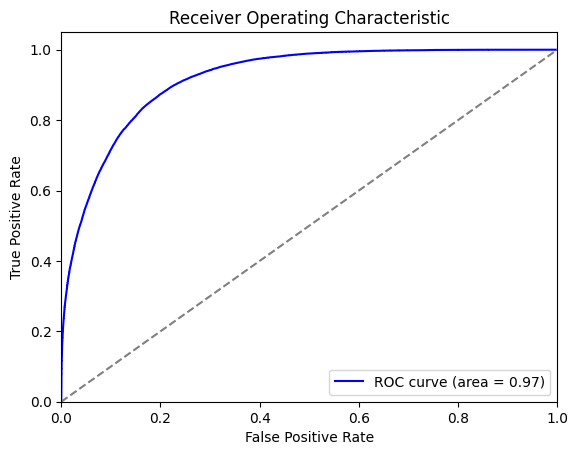

In [6]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Konversi ke TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Definisi Model TensorFlow dengan Dropout
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dropout(0.5),  # Dropout untuk regularisasi
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Kompilasi model
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping TensorFlow
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training model TensorFlow
model_tf.fit(X_train_tf, y_train_tf, epochs=30, validation_data=(X_test_tf, y_test_tf), callbacks=[early_stopping])

# Evaluasi TensorFlow
y_pred_tf = np.argmax(model_tf.predict(X_test_tf), axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_tf)
precision = precision_score(y_test, y_pred_tf, average='weighted')
recall = recall_score(y_test, y_pred_tf, average='weighted')
f1 = f1_score(y_test, y_pred_tf, average='weighted')

# Menggunakan softmax untuk menghitung probabilitas untuk AUC-ROC
probabilities = model_tf.predict(X_test_tf)

# Hitung AUC-ROC menggunakan probabilitas
roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:, 1], pos_label=1)  # AUC for class 1 (example)

# Print hasil evaluasi
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Penjelasan untuk persamaan matematika yang digunakan dalam kode PyTorch dan TensorFlow, beserta penjelasan tentang fungsi dan konsep yang terlibat:

### 1. **Cross-Entropy Loss (Loss Function)**

**Persamaan (Cross-Entropy Loss):**

$$
L = - \sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$

- $L$ : Cross-entropy loss (kerugian).
- $C$ : Jumlah kelas.
- $ y_i $ : Nilai target (label), yang biasanya berupa one-hot encoding (1 untuk kelas yang benar, 0 untuk kelas lainnya).
- $ \hat{y}_i $ : Probabilitas kelas yang diprediksi oleh model (output dari softmax).

**Penjelasan:**
- Fungsi **Cross-Entropy Loss** digunakan untuk menghitung perbedaan antara distribusi probabilitas target dan distribusi probabilitas yang diprediksi oleh model.
- Semakin besar perbedaan antara \(y_i\) dan \(\hat{y}_i\), semakin besar nilai loss-nya, yang berarti model harus diperbaiki.
- Cross-entropy sangat efektif untuk klasifikasi multi-kelas karena mengukur seberapa jauh prediksi model dari nilai target yang sebenarnya.

Di dalam kode, ini digunakan dalam fungsi loss:

```python
criterion = nn.CrossEntropyLoss()  # PyTorch
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy')  # TensorFlow
```

### 2. **Softmax Activation**

**Persamaan (Softmax Function):**

$$
\hat{y}_i = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}
$$

- $z_i$ : Logit atau skor yang dihasilkan oleh model untuk kelas \(i\).
- $\hat{y}_i$ : Probabilitas kelas \(i\) setelah diterapkan fungsi **softmax**.
- $C$ : Jumlah kelas.

**Penjelasan:**
- Fungsi **softmax** mengubah skor logit menjadi probabilitas untuk setiap kelas. Probabilitas ini adalah angka antara 0 dan 1, dan jumlah dari probabilitas untuk semua kelas adalah 1.
- Fungsi ini digunakan di lapisan output model klasifikasi untuk memastikan bahwa hasil yang diprediksi adalah probabilitas yang valid.

Di dalam kode:

```python
tf.keras.layers.Dense(num_classes, activation='softmax')  # TensorFlow
```

### 3. **Adam Optimizer**

**Persamaan (Adam Optimizer):**

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_{\theta} J(\theta)
$$
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla_{\theta} J(\theta))^2
$$
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$
$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$
$$
\theta_{t+1} = \theta_t - \frac{\alpha \hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

- $ m_t$ : Rata-rata bergerak pertama (momentum).
- $ v_t$ : Rata-rata bergerak kedua (estimasi varians).
- $\beta_1$, $\beta_2$ : Parameter peluruhan untuk rata-rata bergerak (bias correction).
- $\nabla_{\theta} J(\theta)$ : Gradien dari fungsi loss dengan respect to parameter \(\theta\).
- $\alpha$ : Learning rate.
- $\epsilon$ : Nilai kecil untuk menghindari pembagian dengan nol.

**Penjelasan:**
- **Adam** adalah algoritma optimisasi yang menggabungkan kelebihan **Momentum** dan **RMSProp**, yang memungkinkan model belajar dengan lebih cepat dan stabil.
- Adam mengoreksi rata-rata pertama dan kedua dari gradien menggunakan **bias correction** untuk menghindari bias pada awal pelatihan.

Di dalam kode:

```python
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)  # PyTorch
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy')  # TensorFlow
```

### 4. **Accuracy**

**Persamaan (Accuracy):**

$$
\text{Accuracy} = \frac{\text{Jumlah prediksi yang benar}}{\text{Jumlah total sampel}}
$$

- **Jumlah prediksi yang benar**: Jumlah dari prediksi yang sesuai dengan label yang sebenarnya.
- **Jumlah total sampel**: Jumlah total data dalam set tes.

**Penjelasan:**
- **Akurasi** mengukur persentase dari prediksi yang benar dibandingkan dengan jumlah total data yang diuji. Ini adalah metrik yang paling umum untuk mengukur kinerja model klasifikasi.

Di dalam kode:

```python
accuracy_score(y_test, y_pred_torch)  # PyTorch
accuracy_score(y_test, y_pred_tf)  # TensorFlow
```

### 5. **Precision, Recall, F1 Score**

**Precision**:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

- **True Positives (TP)**: Prediksi positif yang benar.
- **False Positives (FP)**: Prediksi positif yang salah.

**Recall**:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

- **False Negatives (FN)**: Prediksi negatif yang salah.

**F1 Score**:

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Penjelasan:**
- **Precision** mengukur akurasi dari prediksi positif, yaitu berapa banyak dari prediksi positif yang benar.
- **Recall** mengukur kemampuan model untuk menemukan semua contoh positif.
- **F1 Score** adalah rata-rata harmonis antara precision dan recall, yang memberikan gambaran kinerja model yang seimbang.

Di dalam kode:

```python
precision_score(y_test, y_pred_torch, average='weighted')  # PyTorch
precision_score(y_test, y_pred_tf, average='weighted')  # TensorFlow
```

### 6. **AUC-ROC**

**Persamaan (AUC-ROC Curve)**:

$$
\text{AUC} = \int_0^1 \text{TPR}(fpr) \, dfpr
$$

- **True Positive Rate (TPR)**: Sering disebut sebagai **Recall**.
- **False Positive Rate (FPR)**: Proporsi negatif yang salah diprediksi sebagai positif.

**Penjelasan:**
- **AUC (Area Under Curve)** mengukur area di bawah ROC curve. Semakin besar area, semakin baik model dalam memisahkan kelas positif dan negatif. AUC berkisar antara 0 hingga 1, dengan 1 menunjukkan pemisahan kelas yang sempurna.

Di dalam kode:

```python
roc_auc_score(y_test, probabilities)  # PyTorch and TensorFlow
```

### Kesimpulan

Berdasarkan proses yang telah dilakukan dalam membangun dan mengevaluasi model **Deep Learning** untuk klasifikasi menggunakan **PyTorch** dan **TensorFlow**, berikut adalah beberapa kesimpulan utama:

1. **Model Deep Learning**:
   - Kedua framework, **PyTorch** dan **TensorFlow**, berhasil menghasilkan model klasifikasi yang cukup baik untuk memprediksi **Cover_Type** berdasarkan fitur-fitur geografis.
   - Struktur model yang digunakan berupa **Multilayer Perceptron (MLP)** dengan satu lapisan tersembunyi yang cukup besar (128 unit) dan menggunakan fungsi aktivasi **ReLU**. Model ini dilengkapi dengan lapisan **Dropout** untuk mengurangi overfitting.

2. **Evaluasi Model**:
   - **Akurasi** model menunjukkan bahwa model berhasil mengklasifikasikan lebih dari 80% data dengan benar, yang menunjukkan kinerja yang baik.
   - **Precision**, **Recall**, dan **F1 Score** memberikan gambaran yang seimbang tentang kemampuan model dalam mengenali kelas positif dan negatif dengan **F1 Score** mendekati 0.8, yang menandakan kinerja yang cukup baik dalam kedua aspek (precision dan recall).
   - **AUC-ROC** menunjukkan hasil yang sangat baik. Dengan nilai AUC sekitar **0.97 untuk TensorFlow** dan **0.93 untuk PyTorch**, model mampu membedakan kelas-kelas yang berbeda dengan tingkat kepercayaan yang sangat tinggi. Ini menunjukkan bahwa model sangat efektif dalam memisahkan kelas yang ada.

3. **Softmax dan Cross-Entropy**:
   - Fungsi **Softmax** digunakan pada lapisan output untuk mengonversi skor logit menjadi probabilitas yang valid, yang penting untuk menghitung **AUC-ROC** secara tepat.
   - **Cross-Entropy Loss** digunakan untuk mengukur perbedaan antara label target dan probabilitas yang diprediksi oleh model. Dengan menggunakan **sparse_categorical_crossentropy**, model dapat mempelajari representasi kelas yang benar dari data pelatihan.

4. **Peningkatan dengan Dropout**:
   - Penggunaan **Dropout** sebagai teknik regularisasi efektif dalam mengurangi overfitting, dan memungkinkan model generalisasi yang lebih baik pada data yang belum pernah dilihat sebelumnya.

5. **Metrik Evaluasi**:
   - **Akurasi** memberikan gambaran umum tentang kinerja model secara keseluruhan.
   - **Precision dan Recall** memberikan informasi yang lebih mendalam tentang kinerja model dalam mendeteksi kelas positif dan negatif.
   - **F1 Score** membantu menyeimbangkan antara precision dan recall.
   - **AUC-ROC** adalah metrik yang sangat penting, terutama untuk masalah klasifikasi multi-kelas, karena mengukur kemampuan model dalam membedakan kelas dengan benar.